# Boston Housing Price Prediction
- With this project, I am trying to step into Machine Learning and learn some introductory use of scikit-learn.
- Given the data with various features and price about the house, I have to build a model which predicts house price.
- I will be using Linear Regression

In [148]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [149]:
col_names = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']
boston = pd.read_csv('housing.data', delim_whitespace = True, header = None, names = col_names)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Exploratory Data Analysis

### Data Description

In [150]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Data Visualization

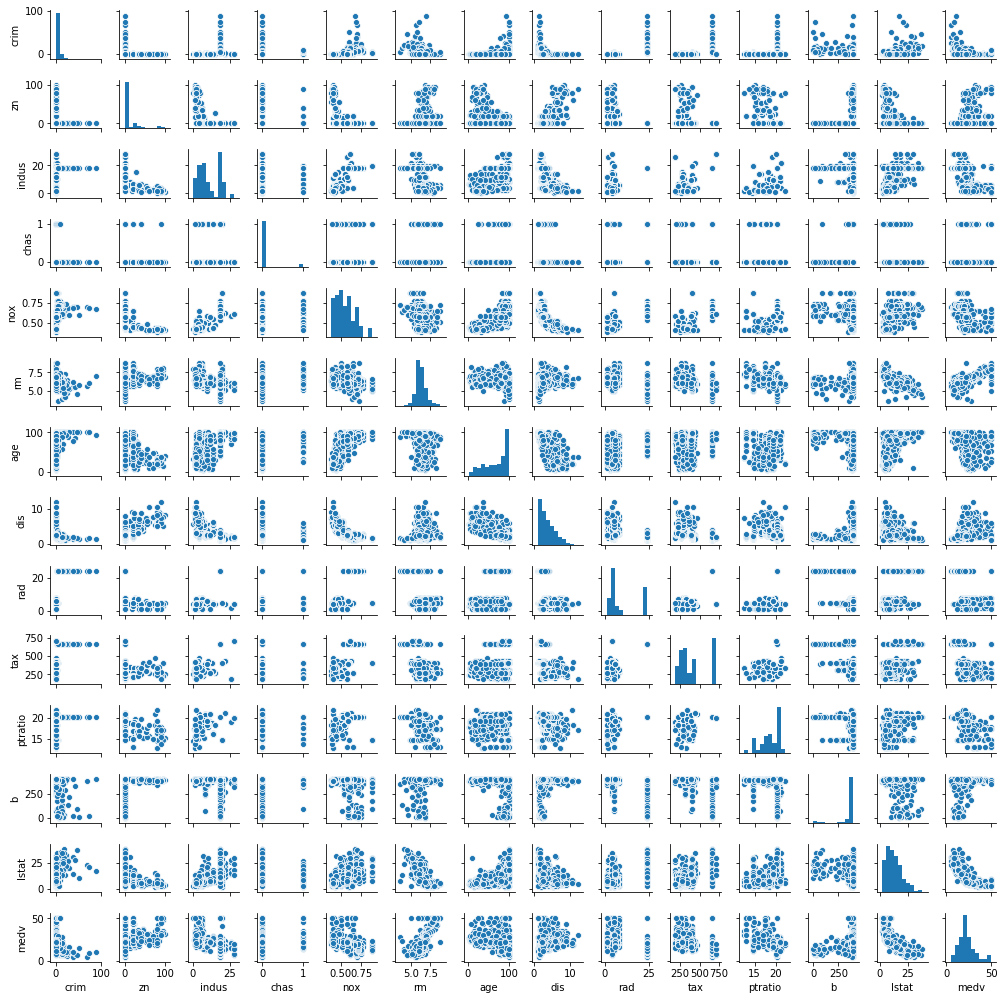

In [151]:
sns.pairplot(boston, height = 1)

### Finding correlation

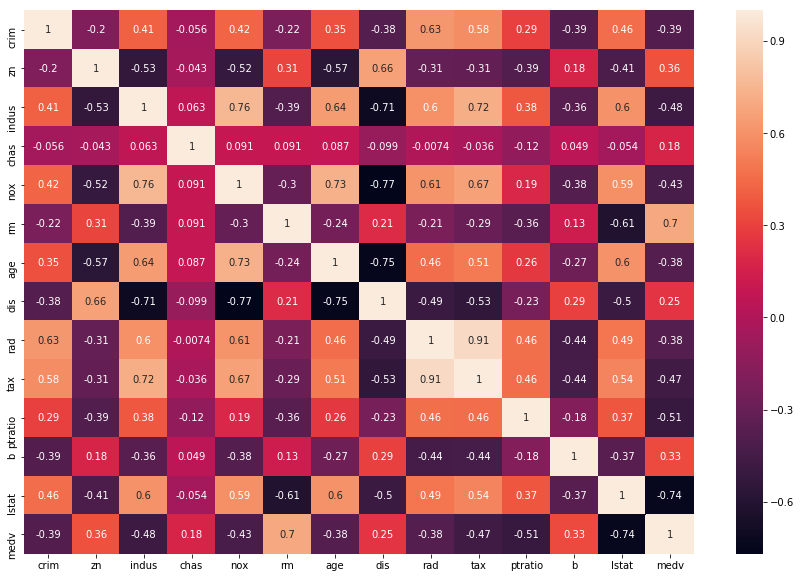

In [152]:
plt.figure(figsize = (15,10))
sns.heatmap(boston.corr(), annot = True)

> From both, plot and correlation heatmap, we can find that only the Number Of Rooms ('rm') column 'strongly' affects the increase in price.
 Therefore, first attempting to only use number of rooms to predict price.

# Making Prediction
Only using one column -> No. of rooms.

In [153]:
X = boston['rm'].values.reshape(-1, 1)
y = boston['medv']

In [154]:
model = LinearRegression()

In [155]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Analyzing prediction

In [156]:
model.coef_

array([9.10210898])

In [157]:
model.intercept_

-34.67062077643857

C:\Users\saxen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Median Value of the house')

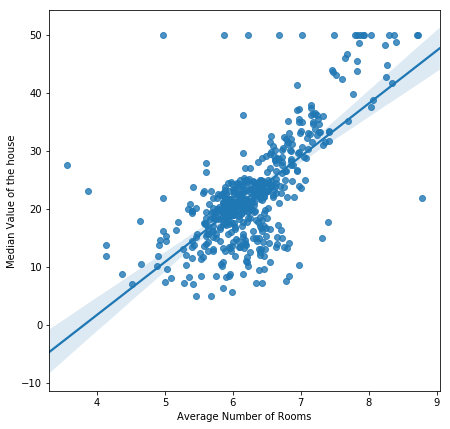

In [158]:
plt.figure(figsize = (7,7))
sns.regplot(boston['rm'], boston['medv'])
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Value of the house')

> From the first look, it looks like model is unable to perform very well when the no. of rooms is less than 5. Mostly due to outliers

##### Joinplot, to observe regression with distribution

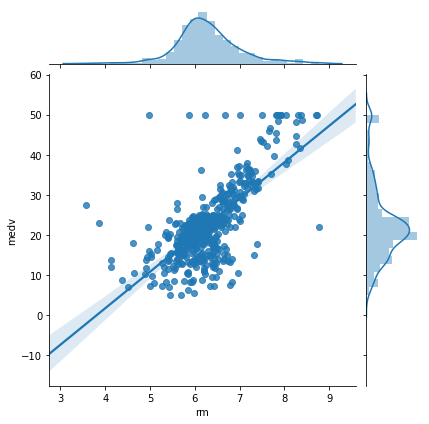

In [159]:
sns.jointplot(data = boston, x = 'rm', y = 'medv', kind = 'reg')

> There is a very high distribution of 50 thousand dollars mean value, indicating that the data was capped. Also, I can see some outliers too, which might be adversly affecting the prediction.

# Denominating outliers

While going through scikit-learn documentations, I found a linear model called <b>RANSAC</b>. It states that it works with subset of 'inliers'. I'm trying it.
[Scikit-Learn RANSAC](https://scikit-learn.org/stable/modules/linear_model.html#ransac-regression)

In [160]:
from sklearn.linear_model import RANSACRegressor

In [161]:
ransac = RANSACRegressor()

In [162]:
ransac.fit(X, y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_threshold=None,
        stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [163]:
# Which are outlier and which are not : first ten
inlier = ransac.inlier_mask_
outlier = np.logical_not(ransac.inlier_mask_)

Text(0, 0.5, 'Median Price')

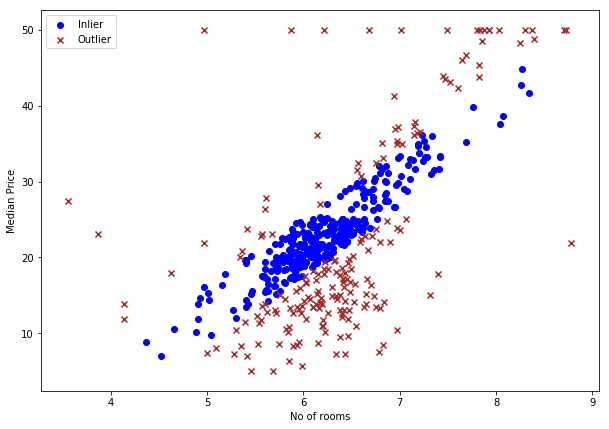

In [164]:
plt.figure(figsize = (10, 7))
plt.scatter(X[inlier], y[inlier], marker = 'o', c = 'blue', label = 'Inlier')
plt.scatter(X[outlier], y[outlier], marker = 'x', c = 'brown', label = 'Outlier')
plt.legend(loc = 'upper left')
plt.xlabel('No of rooms')
plt.ylabel('Median Price')

> Looks like RANSAC has done a great job seperating the outliers!

# Evaluating Model

### I. Fitting Model

In [165]:
X = boston['rm'].values.reshape(-1, 1)

In [166]:
y = boston['medv'].values.reshape(-1, 1)

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [168]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [169]:
ransac = RANSACRegressor()
ransac.fit(X_train, y_train)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_threshold=None,
        stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [170]:
lr_predict = lr.predict(X_test)
ransac_predict = ransac.predict(X_test)

### 1. Evaluating - Residual Analysis

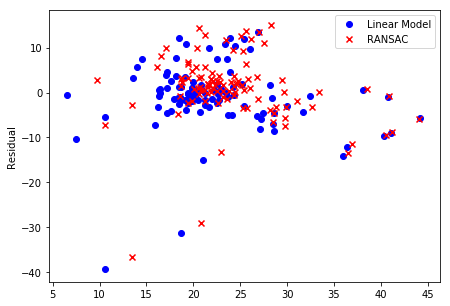

In [171]:
plt.figure(figsize = (7,5))
plt.scatter(lr_predict, lr_predict - y_test, c = 'blue', marker = 'o', label = 'Linear Model')
plt.scatter(ransac_predict, ransac_predict - y_test, c = 'red', marker = 'x', label = 'RANSAC')
plt.legend('Predicted Value')
plt.ylabel('Residual')
plt.legend()

> Looks like all the predictions are somewhat similar using both models.

### 2. Evaluating - Mean Squared Error
Lower is better

In [172]:
mean_squared_error(y_test, lr_predict)  # Linear Regression

54.736653522960886

In [173]:
mean_squared_error(y_test, ransac_predict) # RANSAC

55.521684839035345

> RANSAC has lower MSE error and hence, it performs slightly better.

### 3. Evaluating - Coefficient of Determination
Higher is better. "% of samples explained".

In [174]:
r2_score(y_test, lr_predict) # Linear Regression

0.4689442123901033

In [175]:
r2_score(y_test, ransac_predict) # RANSAC

0.4613278274446576

> Clearly, RANSAC performs better.<br>
But it is evident that no. of rooms alone is unable to predict the accurate price for houses.

# Using all of the columns for prediction

In [176]:
X = boston.iloc[:, :-1]

In [177]:
y = boston['medv']

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [179]:
lr = LinearRegression()
ransac = RANSACRegressor()

In [180]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [181]:
ransac.fit(X_train, y_train)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_threshold=None,
        stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [182]:
lr_pred = lr.predict(X_test)

In [183]:
ransac_pred = ransac.predict(X_test)

## Evaluating

### 1. MSE

In [184]:
mean_squared_error(lr_pred, y_test) # Linear Regression

17.145049824142152

In [185]:
mean_squared_error(ransac_pred, y_test) # RANSAC Regression

31.668187713830633

> When using all the columns, the MSE was significantly reduced and it was observed that Linear Regression performs well. This is because in a very strong relation(closely packed data points), ransac may detect even few inliers as ouliers, and that affects the model. Hence, in my thought, RANSAC is better to be used with data of high variance.

> From [Wikipedia](https://en.wikipedia.org/wiki/Random_sample_consensus)<br>
" <b>RANSAC is not always able to find the optimal set even for moderately contaminated sets and it usually performs badly when the number of inliers is less than 50%.</b> "
